In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas import to_datetime

In [44]:
data = pd.read_excel('Офіційний курс гривні щодо іноземних валют.xlsx')
data.head(10)

,Дата,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
0,01.01.2024,0.0,978,EUR,1,Євро,41.9960
1,02.01.2024,0.0,978,EUR,1,Євро,42.0059
2,03.01.2024,0.0,978,EUR,1,Євро,41.7209
3,04.01.2024,0.0,978,EUR,1,Євро,41.6073
4,05.01.2024,0.0,978,EUR,1,Євро,41.6665
5,06.01.2024,0.0,978,EUR,1,Євро,41.6665
6,07.01.2024,0.0,978,EUR,1,Євро,41.6665
7,08.01.2024,0.0,978,EUR,1,Євро,41.5730
8,09.01.2024,0.0,978,EUR,1,Євро,41.7973
9,10.01.2024,0.0,978,EUR,1,Євро,41.8185


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Дата                        64 non-null     object 
 1   Час                         64 non-null     float64
 2   Код цифровий                64 non-null     int64  
 3   Код літерний                64 non-null     object 
 4   Кількість одиниць           64 non-null     int64  
 5   Назва валюти                64 non-null     object 
 6   Офіційний курс гривні, грн  64 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.6+ KB


In [46]:
data[['Дата', 'Офіційний курс гривні, грн']].head(10)

,Дата,"Офіційний курс гривні, грн"
0,01.01.2024,41.9960
1,02.01.2024,42.0059
2,03.01.2024,41.7209
3,04.01.2024,41.6073
4,05.01.2024,41.6665
5,06.01.2024,41.6665
6,07.01.2024,41.6665
7,08.01.2024,41.5730
8,09.01.2024,41.7973
9,10.01.2024,41.8185


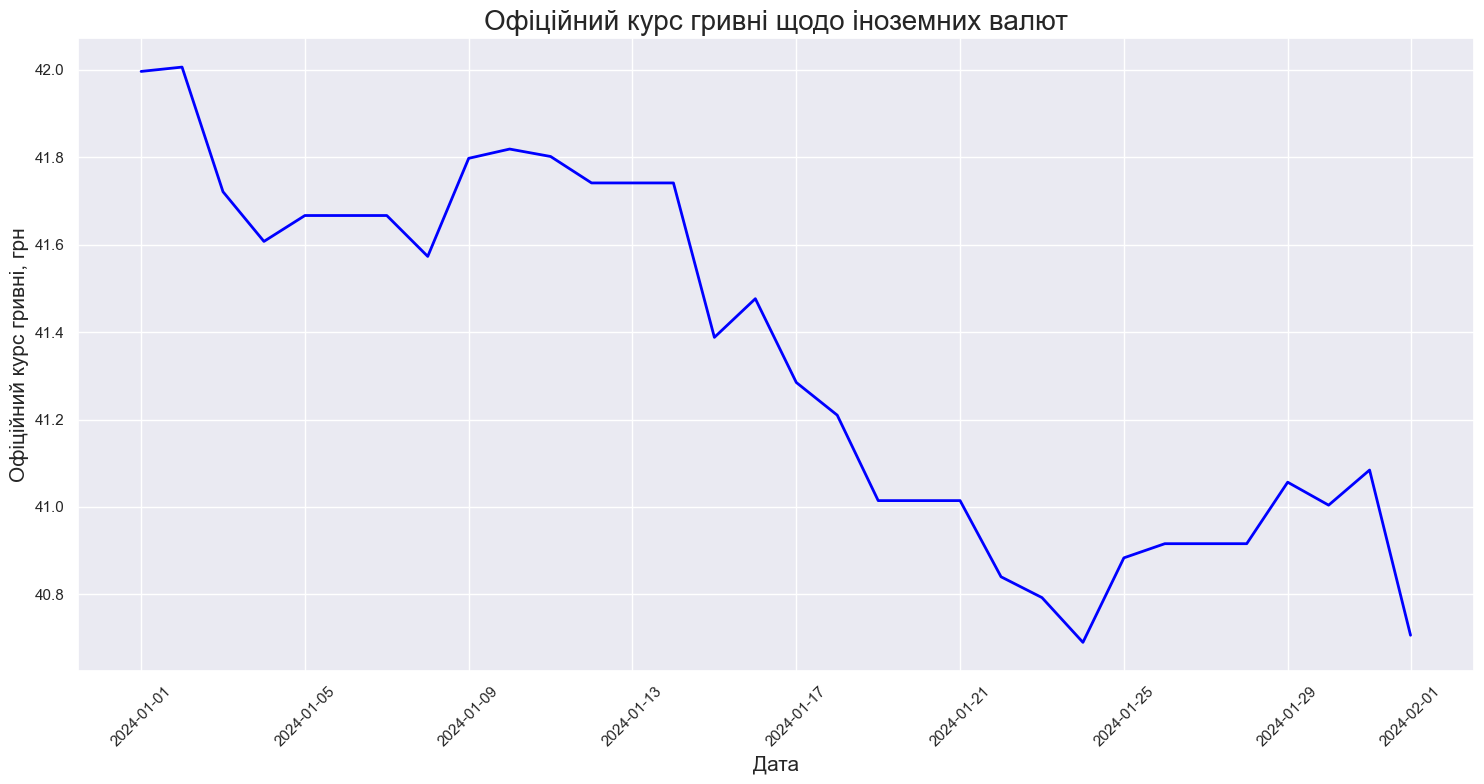

In [47]:
mask = pd.to_datetime(data['Дата'], format='%d.%m.%Y') >= pd.to_datetime('01.01.2024', format='%d.%m.%Y')
data_filtered = data[mask]
data_filtered = data_filtered.drop_duplicates(subset='Дата', keep='first')

date = data_filtered['Дата'].to_numpy()
value = data_filtered['Офіційний курс гривні, грн'].to_numpy()
date = pd.to_datetime(date, format='%d.%m.%Y')


sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
plt.plot(date, value, color='blue', linewidth=2)
plt.title('Офіційний курс гривні щодо іноземних валют', fontsize=20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Офіційний курс гривні, грн', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

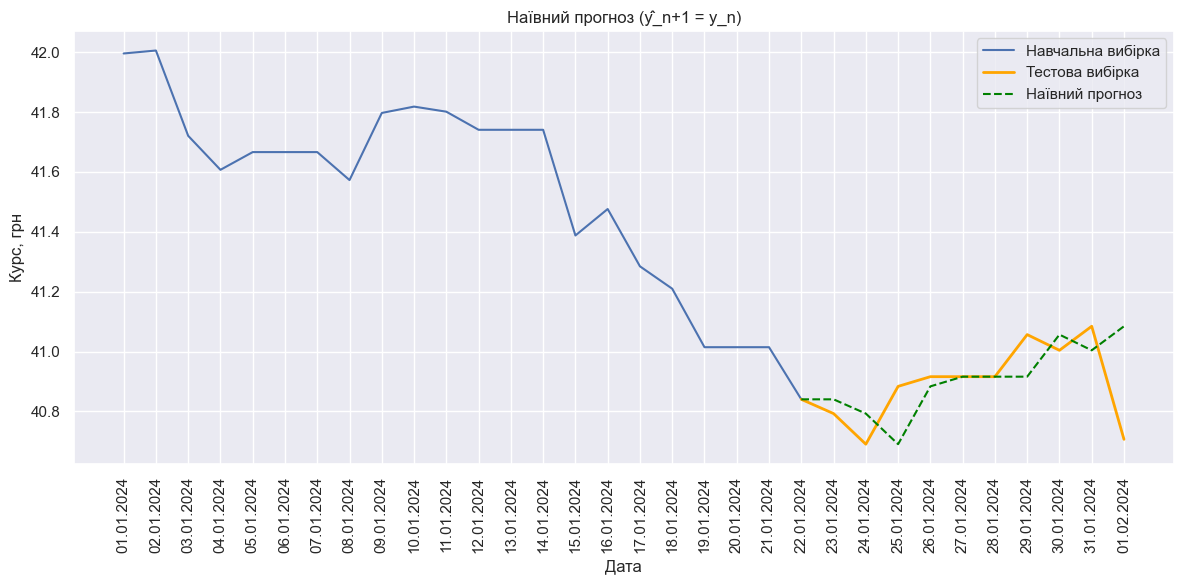


Оцінка якості прогнозу:
MAE: 0.093336
MSE: 0.020256
RMSE: 0.142322
MAPE (%): 0.228535
Max Error: 0.3778
Min Error: 0.0
Median Error: 0.0
Mean Error: -0.012155
Mode Error: 0.0


In [48]:
# Розділення вибірки на тренувальну і тестову
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

# Побудова наївного прогнозу: прогноз = попереднє значення
forecast_df = test_df.copy()
forecast_df['forecast'] = forecast_df['Офіційний курс гривні, грн'].shift(1)
forecast_df.at[forecast_df.index[0], 'forecast'] = train_df['Офіційний курс гривні, грн'].iloc[-1]

# Візуалізація реальних даних і прогнозу
plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Навчальна вибірка')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Тестова вибірка', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['forecast'], label='Наївний прогноз', color='green', linestyle='--')
plt.title('Наївний прогноз (ŷ_n+1 = y_n)')
plt.xlabel('Дата')
plt.ylabel('Курс, грн')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Функція для розрахунку статистичних метрик похибки
def evaluate_forecast(actual, predicted):
    residuals = actual - predicted
    metrics = {
        'MAE': np.mean(np.abs(residuals)).round(6),
        'MSE': np.mean(residuals**2).round(6),
        'RMSE': np.sqrt(np.mean(residuals**2)).round(6),
        'MAPE (%)': (np.mean(np.abs(residuals / actual)) * 100).round(6),
        'Max Error': np.max(np.abs(residuals)).round(6),
        'Min Error': np.min(np.abs(residuals)).round(6),
        'Median Error': np.median(residuals).round(6),
        'Mean Error': np.mean(residuals).round(6),
        'Mode Error': stats.mode(residuals, keepdims=True)[0][0].round(6)
    }
    return metrics

# Розрахунок і виведення метрик
results = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'],
    forecast_df['forecast']
)

print('\nОцінка якості прогнозу:')
for name, val in results.items():
    print(f'{name}: {val}')


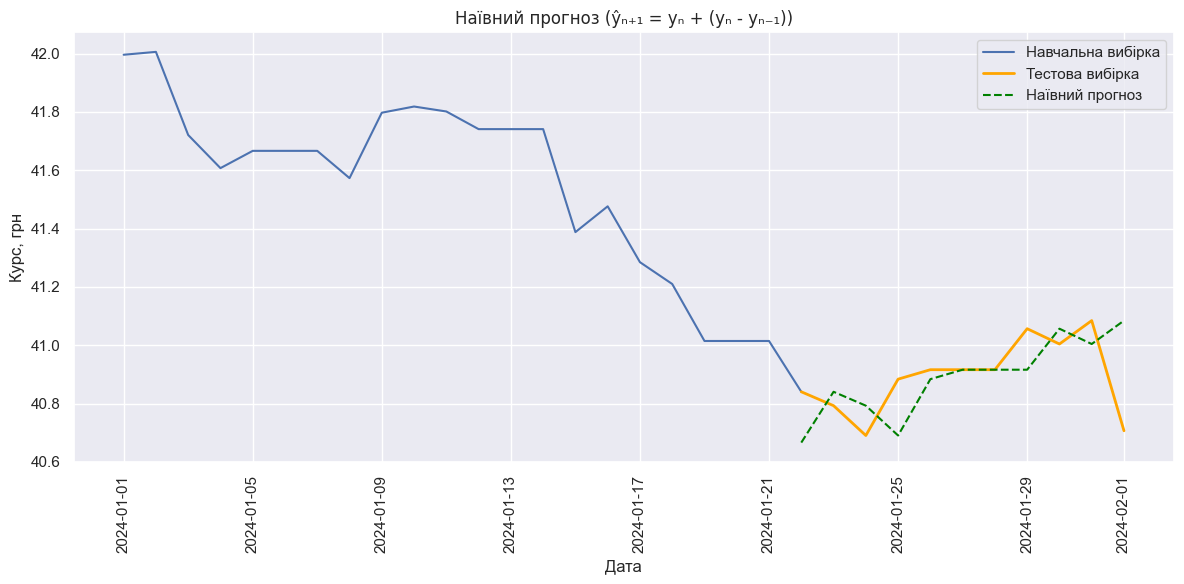


Оцінка якості прогнозу:
MAE: 0.109173
MSE: 0.023014
RMSE: 0.151705
MAPE (%): 0.267311
Max Error: 0.3778
Min Error: 0.0
Median Error: 0.0
Mean Error: 0.003682
Mode Error: 0.0


In [49]:
# Розділення вибірки на тренувальну і тестову
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

# Перетворення типів
train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

# Побудова наївного прогнозу: прогноз = попереднє значення + приріст
forecast_df = test_df.copy()
forecast_df['forecast'] = forecast_df['Офіційний курс гривні, грн'].shift(1)
forecast_df.at[forecast_df.index[0], 'forecast'] = (
    train_df['Офіційний курс гривні, грн'].iloc[-1]
    + (train_df['Офіційний курс гривні, грн'].iloc[-1] - train_df['Офіційний курс гривні, грн'].iloc[-2])
)

# Візуалізація реальних даних і прогнозу
plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Навчальна вибірка')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Тестова вибірка', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['forecast'], label='Наївний прогноз', color='green', linestyle='--')
plt.title('Наївний прогноз (ŷₙ₊₁ = yₙ + (yₙ - yₙ₋₁))', fontname='DejaVu Sans')
plt.xlabel('Дата')
plt.ylabel('Курс, грн')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# # Функція для розрахунку статистичних метрик похибки
# def evaluate_forecast(actual, predicted):
#     residuals = actual - predicted
#     metrics = {
#         'MAE': np.mean(np.abs(residuals)).round(6),
#         'MSE': np.mean(residuals**2).round(6),
#         'RMSE': np.sqrt(np.mean(residuals**2)).round(6),
#         'MAPE (%)': (np.mean(np.abs(residuals / actual)) * 100).round(6),
#         'Max Error': np.max(np.abs(residuals)).round(6),
#         'Min Error': np.min(np.abs(residuals)).round(6),
#         'Median Error': np.median(residuals).round(6),
#         'Mean Error': np.mean(residuals).round(6),
#         'Mode Error': stats.mode(residuals, keepdims=True)[0][0].round(6)
#     }
#     return metrics

# Розрахунок і виведення метрик
results = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'],
    forecast_df['forecast']
)

print('\nОцінка якості прогнозу:')
for name, val in results.items():
    print(f'{name}: {val}')

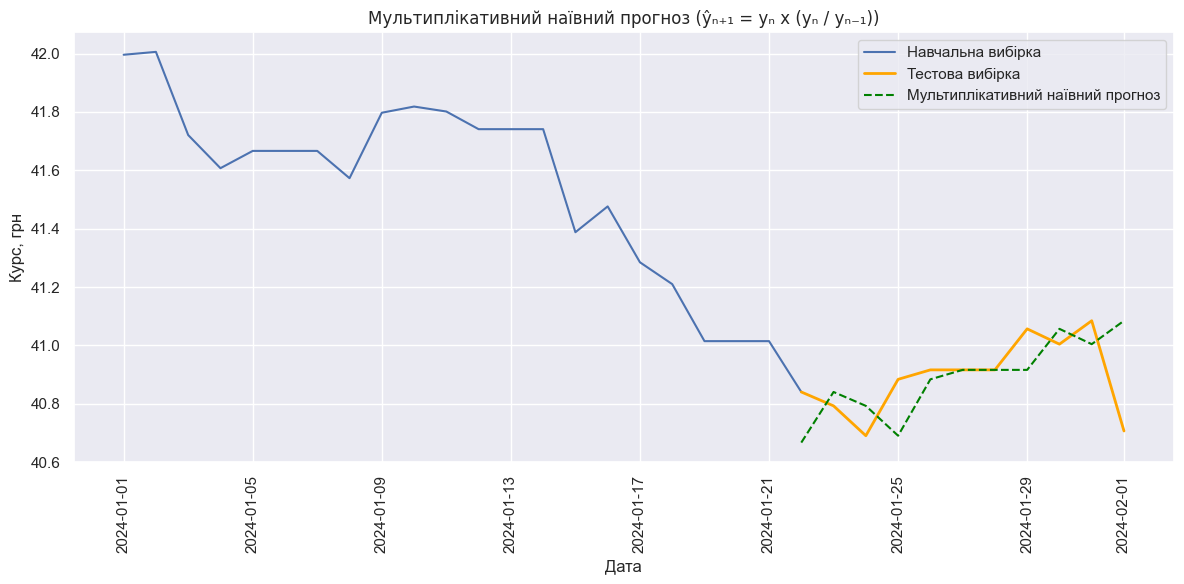


Оцінка якості мультиплікативного наївного прогнозу:
MAE: 0.109105
MSE: 0.022991
RMSE: 0.151628
MAPE (%): 0.267147
Max Error: 0.3778
Min Error: 0.0
Median Error: 0.0
Mean Error: 0.003615
Mode Error: 0.0


In [50]:
# Розділення вибірки на тренувальну і тестову
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

# Перетворення дат і типів
train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

# Побудова наївного мультиплікативного прогнозу: прогноз = yₙ × (yₙ / yₙ₋₁)
forecast_df = test_df.copy()
forecast_df['forecast'] = test_df['Офіційний курс гривні, грн'].shift(1)
# Перший прогноз: ŷₙ₊₁ = yₙ × (yₙ / yₙ₋₁)
last_train = train_df['Офіційний курс гривні, грн'].iloc[-1]
prev_train = train_df['Офіційний курс гривні, грн'].iloc[-2]
forecast_df.at[forecast_df.index[0], 'forecast'] = last_train * (last_train / prev_train)

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Навчальна вибірка')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Тестова вибірка', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['forecast'], label='Мультиплікативний наївний прогноз', color='green', linestyle='--')
plt.title('Мультиплікативний наївний прогноз (ŷₙ₊₁ = yₙ x (yₙ / yₙ₋₁))', fontname='DejaVu Sans')
plt.xlabel('Дата')
plt.ylabel('Курс, грн')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# # Функція для розрахунку статистичних метрик похибки
# def evaluate_forecast(actual, predicted):
#     residuals = actual - predicted
#     metrics = {
#         'MAE': np.mean(np.abs(residuals)).round(6),
#         'MSE': np.mean(residuals**2).round(6),
#         'RMSE': np.sqrt(np.mean(residuals**2)).round(6),
#         'MAPE (%)': (np.mean(np.abs(residuals / actual)) * 100).round(6),
#         'Max Error': np.max(np.abs(residuals)).round(6),
#         'Min Error': np.min(np.abs(residuals)).round(6),
#         'Median Error': np.median(residuals).round(6),
#         'Mean Error': np.mean(residuals).round(6),
#         'Mode Error': stats.mode(residuals, keepdims=True)[0][0].round(6)
#     }
#     return metrics

# Розрахунок і виведення метрик
results = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'],
    forecast_df['forecast']
)

print('\nОцінка якості мультиплікативного наївного прогнозу:')
for name, val in results.items():
    print(f'{name}: {val}')


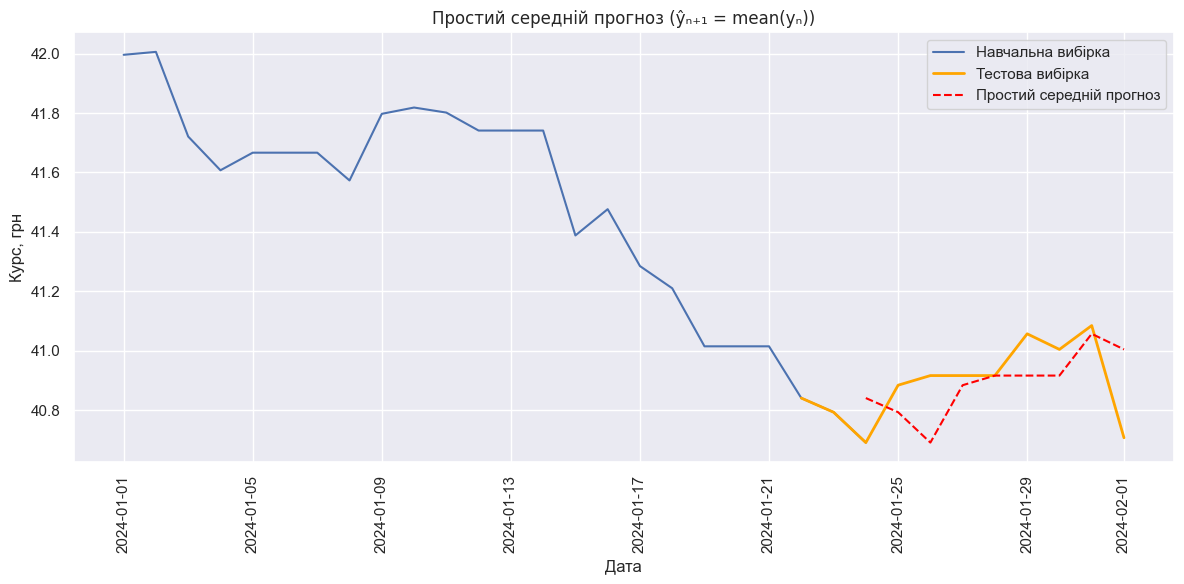


Оцінка якості простого середнього прогнозу:
MAE: 0.110402
MSE: 0.020211
RMSE: 0.142166
MAPE (%): 0.270251
Max Error: 0.2975
Min Error: 0.0
Median Error: 0.0301
Mean Error: 0.010678
Mode Error: -0.2975


In [51]:
# Розділення вибірки на тренувальну і тестову
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index + 2].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

# Перетворення дат і типів
train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

# Побудова наївного прогнозу: прогноз = середнє значення всіх yₙ
forecast_df = test_df.copy()
forecast_df['forecast'] = test_df['Офіційний курс гривні, грн'].shift(2)
# Перший прогноз ставимо як середнє тестових значень
forecast_df.at[forecast_df.index[0], 'forecast'] = test_df['Офіційний курс гривні, грн'].iloc[:len(test_df)].mean()

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Навчальна вибірка')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Тестова вибірка', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['forecast'], label='Простий середній прогноз', color='red', linestyle='--')
plt.title('Простий середній прогноз (ŷₙ₊₁ = mean(yₙ))', fontname='DejaVu Sans')
plt.xlabel('Дата')
plt.ylabel('Курс, грн')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# # Функція для розрахунку статистичних метрик похибки
# def evaluate_forecast(actual, predicted):
#     residuals = actual - predicted
#     metrics = {
#         'MAE': np.mean(np.abs(residuals)).round(6),
#         'MSE': np.mean(residuals**2).round(6),
#         'RMSE': np.sqrt(np.mean(residuals**2)).round(6),
#         'MAPE (%)': (np.mean(np.abs(residuals / actual)) * 100).round(6),
#         'Max Error': np.max(np.abs(residuals)).round(6),
#         'Min Error': np.min(np.abs(residuals)).round(6),
#         'Median Error': np.median(residuals).round(6),
#         'Mean Error': np.mean(residuals).round(6),
#         'Mode Error': stats.mode(residuals, keepdims=True)[0][0].round(6)
#     }
#     return metrics

# Розрахунок і виведення метрик (без NaN)
valid_idx = ~forecast_df['forecast'].isna()
results = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'][valid_idx],
    forecast_df['forecast'][valid_idx]
)

print('\nОцінка якості простого середнього прогнозу:')
for name, val in results.items():
    print(f'{name}: {val}')


In [53]:
# Розділення вибірки
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

# Перетворення дат і типів
train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

mae_error, mse_error, rmse_error = [], [], []
window_sizes = []

for window_size in range(1, min(30, len(test_df))):
    forecast_df = test_df.copy()
    forecast_df['ma_forecast'] = test_df['Офіційний курс гривні, грн'].rolling(window=window_size).mean().shift(1)

    for j in range(1, window_size):
        forecast_df.loc[forecast_df.index[j], 'ma_forecast'] = test_df['Офіційний курс гривні, грн'].iloc[:j].mean()

    valid_idx = ~forecast_df['ma_forecast'].isna()
    errors = evaluate_forecast(
        test_df['Офіційний курс гривні, грн'][valid_idx],
        forecast_df['ma_forecast'][valid_idx]
    )

    rmse_error.append(errors['RMSE'])
    mae_error.append(errors['MAE'])
    mse_error.append(errors['MSE'])
    window_sizes.append(window_size)

best_mae = np.min(mae_error)
best_mae_idx = np.argmin(mae_error)
best_window = window_sizes[best_mae_idx]

print(f'Best MAE: {best_mae} for window size {best_window}')
print(f'Best MSE: {mse_error[best_mae_idx]} for window size {best_window}')
print(f'Best RMSE: {rmse_error[best_mae_idx]} for window size {best_window}')


Best MAE: 0.101105 for window size 2
Best MSE: 0.019226 for window size 2
Best RMSE: 0.138659 for window size 2


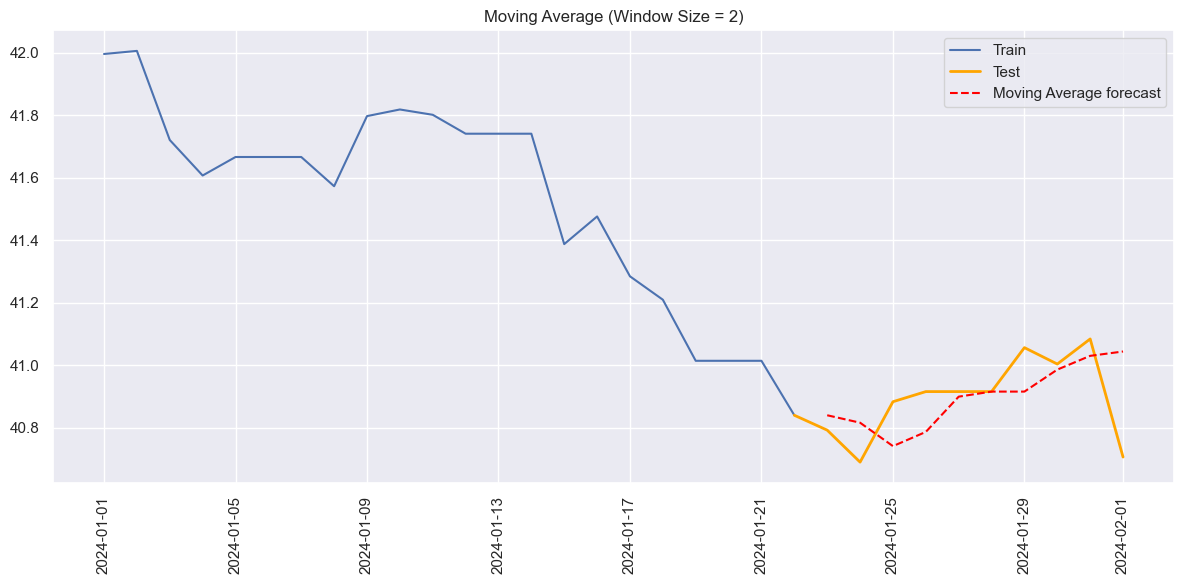


Оцінка якості Moving Average прогнозу:
MAE: 0.101105
MSE: 0.019226
RMSE: 0.138659
MAPE (%): 0.24758
Max Error: 0.33765
Min Error: 0.0
Median Error: 0.017
Mean Error: -0.001165
Mode Error: -0.33765


In [55]:
window_size = 2

split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

forecast_df = test_df.copy()
forecast_df['ma_forecast'] = test_df['Офіційний курс гривні, грн'].rolling(window=window_size).mean().shift(1)

for j in range(1, window_size):
    forecast_df.loc[forecast_df.index[j], 'ma_forecast'] = test_df['Офіційний курс гривні, грн'].iloc[:j].mean()

plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Train')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Test', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['ma_forecast'], label='Moving Average forecast', color='red', linestyle='--')
plt.legend()
plt.title(f'Moving Average (Window Size = {window_size})')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

valid_idx = ~forecast_df['ma_forecast'].isna()
errors = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'][valid_idx],
    forecast_df['ma_forecast'][valid_idx]
)

print('\nОцінка якості Moving Average прогнозу:')
for metric, value in errors.items():
    print(f'{metric}: {value}')


In [56]:
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

alphas = np.arange(0.01, 1.01, 0.01)
mae_error, mse_error, rmse_error = [], [], []

for alpha in alphas:
    forecast_df = test_df.copy()
    forecast_df['ma_forecast'] = test_df['Офіційний курс гривні, грн'].ewm(alpha=alpha).mean().shift(1)

    valid_idx = ~forecast_df['ma_forecast'].isna()
    errors = evaluate_forecast(
        test_df['Офіційний курс гривні, грн'][valid_idx],
        forecast_df['ma_forecast'][valid_idx]
    )
    mae_error.append(errors['MAE'])
    mse_error.append(errors['MSE'])
    rmse_error.append(errors['RMSE'])

best_mae = np.min(mae_error)
best_mae_idx = np.argmin(mae_error)
best_alpha = alphas[best_mae_idx]

print(f'Best MAE: {best_mae} for alpha = {best_alpha}')
print(f'Best MSE: {mse_error[best_mae_idx]} for alpha = {best_alpha}')
print(f'Best RMSE: {rmse_error[best_mae_idx]} for alpha = {best_alpha}')


Best MAE: 0.101574 for alpha = 0.79
Best MSE: 0.020567 for alpha = 0.79
Best RMSE: 0.143412 for alpha = 0.79


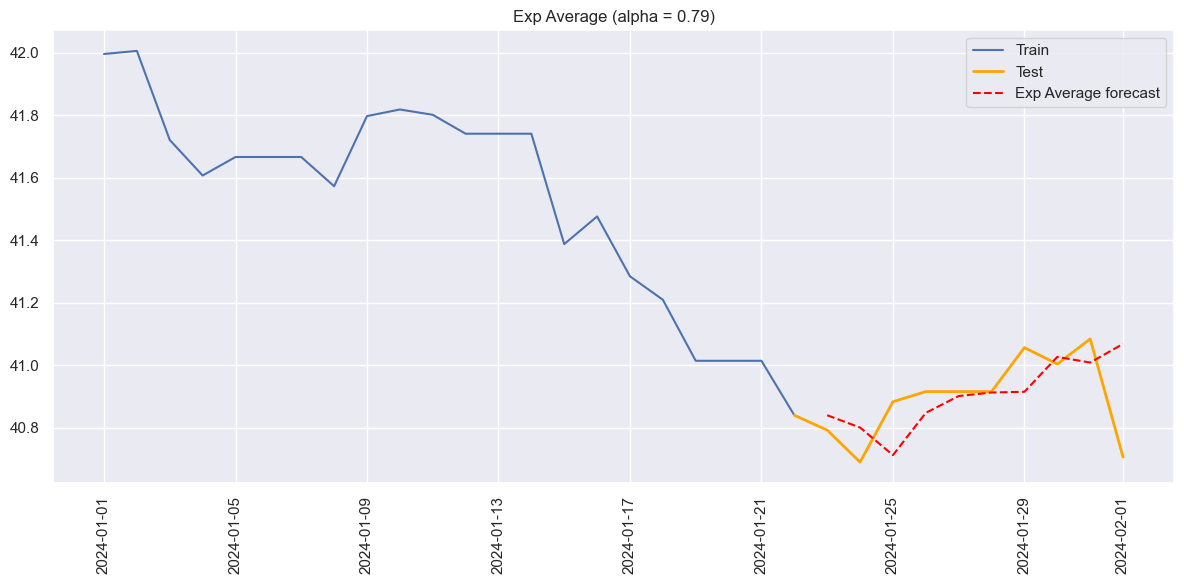


Оцінка якості Exp Average прогнозу:
MAE: 0.101574
MSE: 0.020567
RMSE: 0.143412
MAPE (%): 0.248716
Max Error: 0.361944
Min Error: 0.002993
Median Error: 0.008626
Mean Error: -0.007016
Mode Error: -0.361944


In [58]:
split_index = int(len(data_filtered) * 0.7)
train_df = data_filtered.iloc[:split_index].copy()
test_df = data_filtered.iloc[split_index - 1:].copy()

train_df['Дата'] = pd.to_datetime(train_df['Дата'], format='%d.%m.%Y')
test_df['Дата'] = pd.to_datetime(test_df['Дата'], format='%d.%m.%Y')
train_df['Офіційний курс гривні, грн'] = train_df['Офіційний курс гривні, грн'].astype(float)
test_df['Офіційний курс гривні, грн'] = test_df['Офіційний курс гривні, грн'].astype(float)

alpha = 0.79
forecast_df = test_df.copy()
forecast_df['ma_forecast'] = test_df['Офіційний курс гривні, грн'].ewm(alpha=alpha).mean().shift(1)

plt.figure(figsize=(12, 6))
plt.plot(train_df['Дата'], train_df['Офіційний курс гривні, грн'], label='Train')
plt.plot(test_df['Дата'], test_df['Офіційний курс гривні, грн'], label='Test', color='orange', linewidth=2)
plt.plot(forecast_df['Дата'], forecast_df['ma_forecast'], label='Exp Average forecast', color='red', linestyle='--')
plt.legend()
plt.title(f'Exp Average (alpha = {alpha})')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

valid_idx = ~forecast_df['ma_forecast'].isna()
errors = evaluate_forecast(
    test_df['Офіційний курс гривні, грн'][valid_idx],
    forecast_df['ma_forecast'][valid_idx]
)

print('\nОцінка якості Exp Average прогнозу:')
for metric, value in errors.items():
    print(f'{metric}: {value}')
